# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
pokemon = pd.read_csv('pokemon.csv')

From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [3]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
# your code here
#Total = HP + Attack + Defense + Special Attack + Special Defense + Speed

# This hypothesis suggests that the Total stat is simply the sum of the individual base stats of a Pokemon. In many cases, this formula works, but there might be some exceptions due to unique abilities, Mega Evolutions, or special circumstances in certain games.
# To test this hypothesis, we can collect data on various Pokemon and compare their "Total" stats to the sum of their individual base stats 


pokemon['total2'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
comparacion = pokemon['total2'] == pokemon['Total']

comparacion.unique()


# def check_sum(df):
#     for index, row in df.iterrows():
#         total = row['Total']
#         abilities_sum = row['HP'] + row['Attack'] + row['Defense'] + row['Sp. Atk'] + row['Sp. Def'] + row['Speed']
        
#         if total != abilities_sum:
#             return False
    
#     return True

# result = check_sum(pokemon)
# result

array([ True])

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [5]:
from sklearn.preprocessing import OneHotEncoder
type1 = pokemon[['Type 1']]
print(type1)
encoder = OneHotEncoder().fit(type1)
encoded = encoder.transform(type1).toarray()
cols = encoder.get_feature_names_out()
type1_encoded = pd.DataFrame(encoded,columns=cols)
type1_encoded

type1_encoded = type1_encoded.rename(columns=lambda x: x.replace('Type 1_', ''))

      Type 1
0      Grass
1      Grass
2      Grass
3      Grass
4       Fire
..       ...
795     Rock
796     Rock
797  Psychic
798  Psychic
799     Fire

[800 rows x 1 columns]


In [6]:
type1_encoded.nunique()

Bug         2
Dark        2
Dragon      2
Electric    2
Fairy       2
Fighting    2
Fire        2
Flying      2
Ghost       2
Grass       2
Ground      2
Ice         2
Normal      2
Poison      2
Psychic     2
Rock        2
Steel       2
Water       2
dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder
type2 = pokemon[['Type 2']]
print(type2)
encoder = OneHotEncoder().fit(type2)
encoded = encoder.transform(type2).toarray()
cols = encoder.get_feature_names_out()
type2_encoded = pd.DataFrame(encoded,columns=cols)
type2_encoded

type2_encoded = type2_encoded.rename(columns=lambda x: x.replace('Type 2_', ''))
type2_encoded

     Type 2
0    Poison
1    Poison
2    Poison
3    Poison
4       NaN
..      ...
795   Fairy
796   Fairy
797   Ghost
798    Dark
799   Water

[800 rows x 1 columns]


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
type2_encoded.nunique()

Bug         2
Dark        2
Dragon      2
Electric    2
Fairy       2
Fighting    2
Fire        2
Flying      2
Ghost       2
Grass       2
Ground      2
Ice         2
Normal      2
Poison      2
Psychic     2
Rock        2
Steel       2
Water       2
nan         2
dtype: int64

In [15]:
onehot_encoded = type1_encoded + type2_encoded
onehot_encoded

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


In [16]:
onehot_encoded.drop(columns=type2_encoded.columns[-1], axis=1,inplace=True)

In [22]:
onehot_encoded

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# your code here
# from sklearn.preprocessing import OneHotEncoder

# X_cat1 = pokemon['Type 1']
# X_cat2 = pokemon['Type 2']

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder().fit(X_cat1)

# # Get the feature names for the encoded data
# cols = encoder.get_feature_names_out(input_features=X_cat1.columns)

# # Transform the categorical data into a dense array
# encoded1 = encoder.transform(X_cat1).toarray()
# encoded2 = encoder.transform(X_cat2).toarray()
# encoded1.reshape(-1, 1)
# encoded2.reshape(-1, 1)

# # Create a DataFrame with the encoded data and feature names
# onehot_encoded1 = pd.DataFrame(encoded1, columns=cols)
# onehot_encoded2 = pd.DataFrame(encoded2, columns=cols)

# onehot_encoded1

# #Concatenate
# onehot_encoded = onehot_encoded1 + onehot_encoded2

# # Display the first few rows of the encoded DataFrame
# display(onehot_encoded.head())

## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [26]:
correlations = onehot_encoded.corrwith(pokemon['Total'])
correlations

Bug        -0.145781
Dark        0.056154
Dragon      0.229705
Electric    0.020971
Fairy      -0.036698
Fighting    0.077786
Fire        0.078726
Flying      0.059383
Ghost       0.003641
Grass      -0.052592
Ground      0.015060
Ice         0.060248
Normal     -0.105331
Poison     -0.090441
Psychic     0.124688
Rock        0.032731
Steel       0.109703
Water      -0.021665
dtype: float64

In [27]:
correlations = correlations.sort_values(ascending=False)
correlations

Dragon      0.229705
Psychic     0.124688
Steel       0.109703
Fire        0.078726
Fighting    0.077786
Ice         0.060248
Flying      0.059383
Dark        0.056154
Rock        0.032731
Electric    0.020971
Ground      0.015060
Ghost       0.003641
Water      -0.021665
Fairy      -0.036698
Grass      -0.052592
Poison     -0.090441
Normal     -0.105331
Bug        -0.145781
dtype: float64

In [ ]:
top_pokemon_type = correlations.index[0]
top_pokemon_type

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,318
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,405
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,525
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,625
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,600
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,700
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,600
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,680


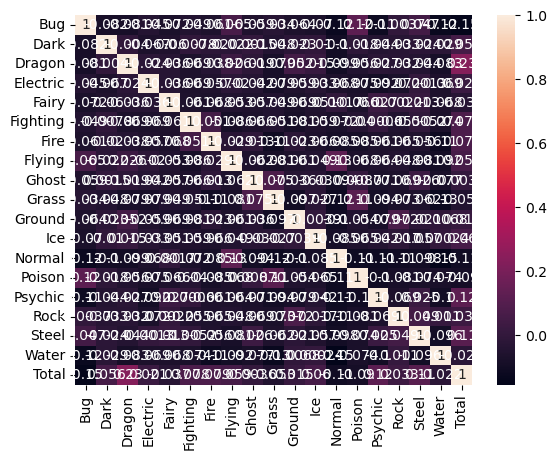

In [25]:
pokemon_corr = pd.concat([onehot_encoded, pokemon['Total']], axis=1)
display(pokemon_corr) 

import seaborn as sns
import matplotlib.pyplot as plt


correlations_matrix = pokemon_corr.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [ ]:
# your code here